# Linear Regression: Finding the Best of the Best (Lines of Fit)
In this short notebook, we will demonstrate a simple, supervised technique for modeling the relationship between variables. Output in this case will be a linear equation, that is, one of the form mx + b. 

### A Little Housekeeping
We will first import all dependencies and set up our programming environment. 

In [41]:
# Reset the workspace, forcibly deleting all existing variables 
%reset -f

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Data
Linear regression can be performed on any dataset, regardless of whether a clear upward or downward trend can be extrapolated. However, for the sake of demonstration, we will choose a set which does have a clear trend. 

Thus we'll be using a straightforward set of all-time historical information for TSLA, which has enjoyed a generally meteoric rise on the NASDAQ from 2010 until present. Source: Yahoo Finance (https://finance.yahoo.com/quote/TSLA/history?period1=1277769600&period2=1598400000&interval=1d&filter=history&frequency=1d)

We'll first import the data to a Pandas dataframe, preview the first handful of rows, and print a few statistics in order to get a feel for the data. 

Please note that the file, which is .csv format, will be saved in a directory named 'Data.'

In [43]:
df = pd.read_csv('../Data/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [44]:
print('Dataframe shape:', df.shape)
print('Number of data examples:', df.shape[0])
print('Number of data featrues:', df.shape[1])
print('Number of dimensions:', df.ndim)

Dataframe shape: (2558, 7)
Number of data examples: 2558
Number of data featrues: 7
Number of dimensions: 2


It can also be useful to display summary statistics. 

In [45]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2558.000000,2558.000000,2558.000000,2558.000000,2558.000000,2.558000e+03
mean,230.097959,234.898945,225.187795,230.249179,230.249179,6.188117e+06
std,234.183273,241.051378,227.267734,234.664131,234.664131,5.771928e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,35.272500,36.000000,34.750000,35.297501,35.297501,2.065275e+06
50%,219.745002,222.545006,215.474999,219.260002,219.260002,4.850400e+06
75%,291.237504,297.714989,285.592507,291.225006,291.225006,7.995000e+06
max,2126.280029,2129.000000,2025.050049,2049.979980,2049.979980,6.093880e+07


They say a picture is worth a thousand words. We'll now visualize the data using matplotlib, which can easily pull information from a Pandas dataframe. 

A small caveat is that the independent (x) and dependent (y) variables must be specified in order to use the df.plot() function. For that, it is trivially easy to simply look at the column headers displayed in df.head(). 

Another handy way to access these headers is by calling the columns attribute of the dataframe using df.columns, as seen below. 

In [51]:
df.columns # Displays column headers needed for plotting

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

We will plot stock close values against the date, using all values in the set (TSLA close prices from 2010 to present). 

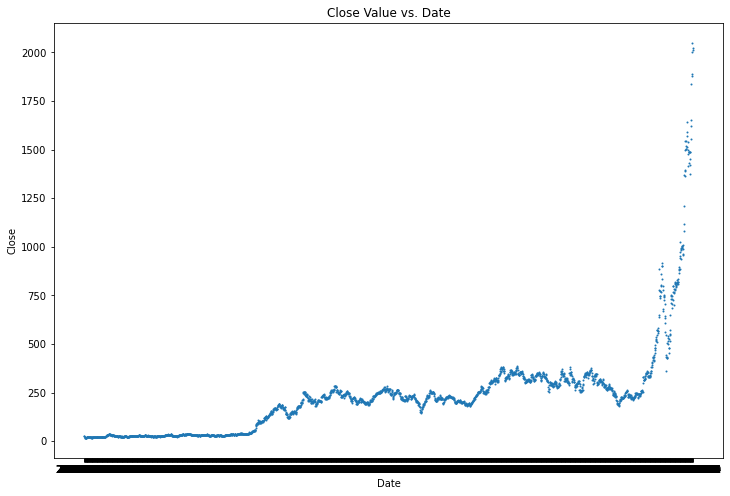

In [58]:
fig, ax = plt.subplots(figsize=(12,8), facecolor = 'white') # Sets area behind axes to white
ax.set_title('Close Value vs. Date')
df.plot(kind = 'scatter', x = 'Date', y = 'Close', ax = ax, s = 1)
plt.show()